torch.Size([100, 784])


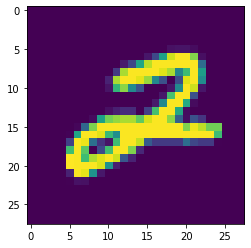

<ipython-input-20-d38a39542c3c>:108: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  sample = torch.tensor(sample)


RuntimeError: ignored

In [20]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import MinMaxScaler
from random import random
# from sklearn.preprocessing import transform
class ANNModel(nn.Module):

  def __init__(self, input_dim, hidden_dim, output_dim):
    super(ANNModel, self).__init__()
    self.a1 = nn.Linear(input_dim, hidden_dim)
    self.sig = nn.Sigmoid()
    self.a2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
      out = self.a1(x)
      out = self.sig(out)
      out = self.a2(out)
      out = self.sig(out)
      return out
  def predict(self, x):
      output = self.forward(x).tolist()[0]
      lebel = output.index(max(output))
      return lebel

(X_train, y_train), (X_test, y_test) = mnist.load_data()
x_train = X_train[0:100]
Y_train = y_train[0:100]
l_data =[]


# 1D array

len1 = len(x_train)
for _ in range(len1):
  samples = x_train[_]
  len2 = len(samples)
  xi=[]
  for i in range(len2):
    for j in range(len2):
      xi.append(samples[i][j])
  l_data.append(list(np.array(xi, dtype='float32')))

# normalise

l_data = np.array(l_data)
sc = MinMaxScaler().fit(l_data)
X_t = sc.transform(l_data)

# Converting to tensorsn training

x_train = torch.tensor(l_data)
Y_train = torch.tensor(Y_train)

# Converting to tensors test

X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

batch_s = 10
n_itr = 5000
n_ep = n_itr/(len(x_train) / batch_s)
n_ep = int(n_ep)

input_dim = x_train.shape[1]
hidden_dim = 100
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

criterion = torch.nn.CrossEntropyLoss()
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

tensords = torch.utils.data.TensorDataset(x_train, Y_train)
print(x_train.shape)

dataloader =  torch.utils.data.DataLoader(tensords, batch_size=batch_s,shuffle=True)

for epoch in range(n_ep):
  for i, (x,y) in enumerate(dataloader):
    x = Variable(x.view(-1, input_dim))
    y = Variable(y)
    output = model(x)
    optimizer.zero_grad()
    loss = criterion(output,y)
    loss.backward()
    optimizer.step() 
  
# random image

im=X_train[int(random()*len(X_train))]
plt.imshow(im)
plt.show()
xj=[]
sample=[]
for k in im:
  for x in k:
    

print(model.predict(sample))